In [1]:
import numpy as np
import pandas as pd

In [6]:
data = pd.read_csv(r"C:\Users\user\Downloads\Admission_Predic.csv")

In [7]:
data


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [11]:
data['Chance of Admit '] = data['Chance of Admit '].apply(lambda x:1 if x>=0.5 else 0)
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,1
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,1
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1
396,397,325,107,3,3.0,3.5,9.11,1,1
397,398,330,116,4,5.0,4.5,9.45,1,1
398,399,312,103,3,3.5,4.0,8.78,0,1


In [12]:
data['Chance of Admit '].value_counts()

1    367
0     33
Name: Chance of Admit , dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [16]:
x = data.drop('Chance of Admit ', axis=1)
y = data['Chance of Admit ']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [17]:
x.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [18]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Chance of Admit , dtype: int64

In [20]:
print(xtrain)
print(xtest)
print(ytrain)
print(ytest)


     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
336         337        319          110                  3  3.0   2.5  8.79   
64           65        325          111                  3  3.0   3.5  8.70   
55           56        320          103                  3  3.0   3.0  7.70   
106         107        329          111                  4  4.5   4.5  9.18   
300         301        309          106                  2  2.5   2.5  8.00   
..          ...        ...          ...                ...  ...   ...   ...   
323         324        305          102                  2  2.0   2.5  8.18   
192         193        322          114                  5  4.5   4.0  8.94   
117         118        290          104                  4  2.0   2.5  7.46   
47           48        339          119                  5  4.5   4.0  9.70   
172         173        322          110                  4  4.0   5.0  9.13   

     Research  
336         0  
64          0  
55 

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtree = DecisionTreeClassifier()
dtree.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [23]:
ypredict = dtree.predict(xtest)

In [24]:
ypredict


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
print("Accuracy Score of the Model is :",accuracy_score(ytest, ypredict))

Accuracy Score of the Model is : 0.8875


In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

[Text(0.5576923076923077, 0.9375, 'X[6] <= 7.85\ngini = 0.149\nsamples = 320\nvalue = [26, 294]'),
 Text(0.3269230769230769, 0.8125, 'X[1] <= 308.5\ngini = 0.48\nsamples = 30\nvalue = [18, 12]'),
 Text(0.19230769230769232, 0.6875, 'X[5] <= 2.75\ngini = 0.413\nsamples = 24\nvalue = [17, 7]'),
 Text(0.11538461538461539, 0.5625, 'X[2] <= 104.5\ngini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(0.07692307692307693, 0.4375, 'X[0] <= 378.5\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.038461538461538464, 0.3125, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.11538461538461539, 0.3125, 'X[5] <= 2.25\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.07692307692307693, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.15384615384615385, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.15384615384615385, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2692307692307692, 0.5625, 'X[4] <= 2.75\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text

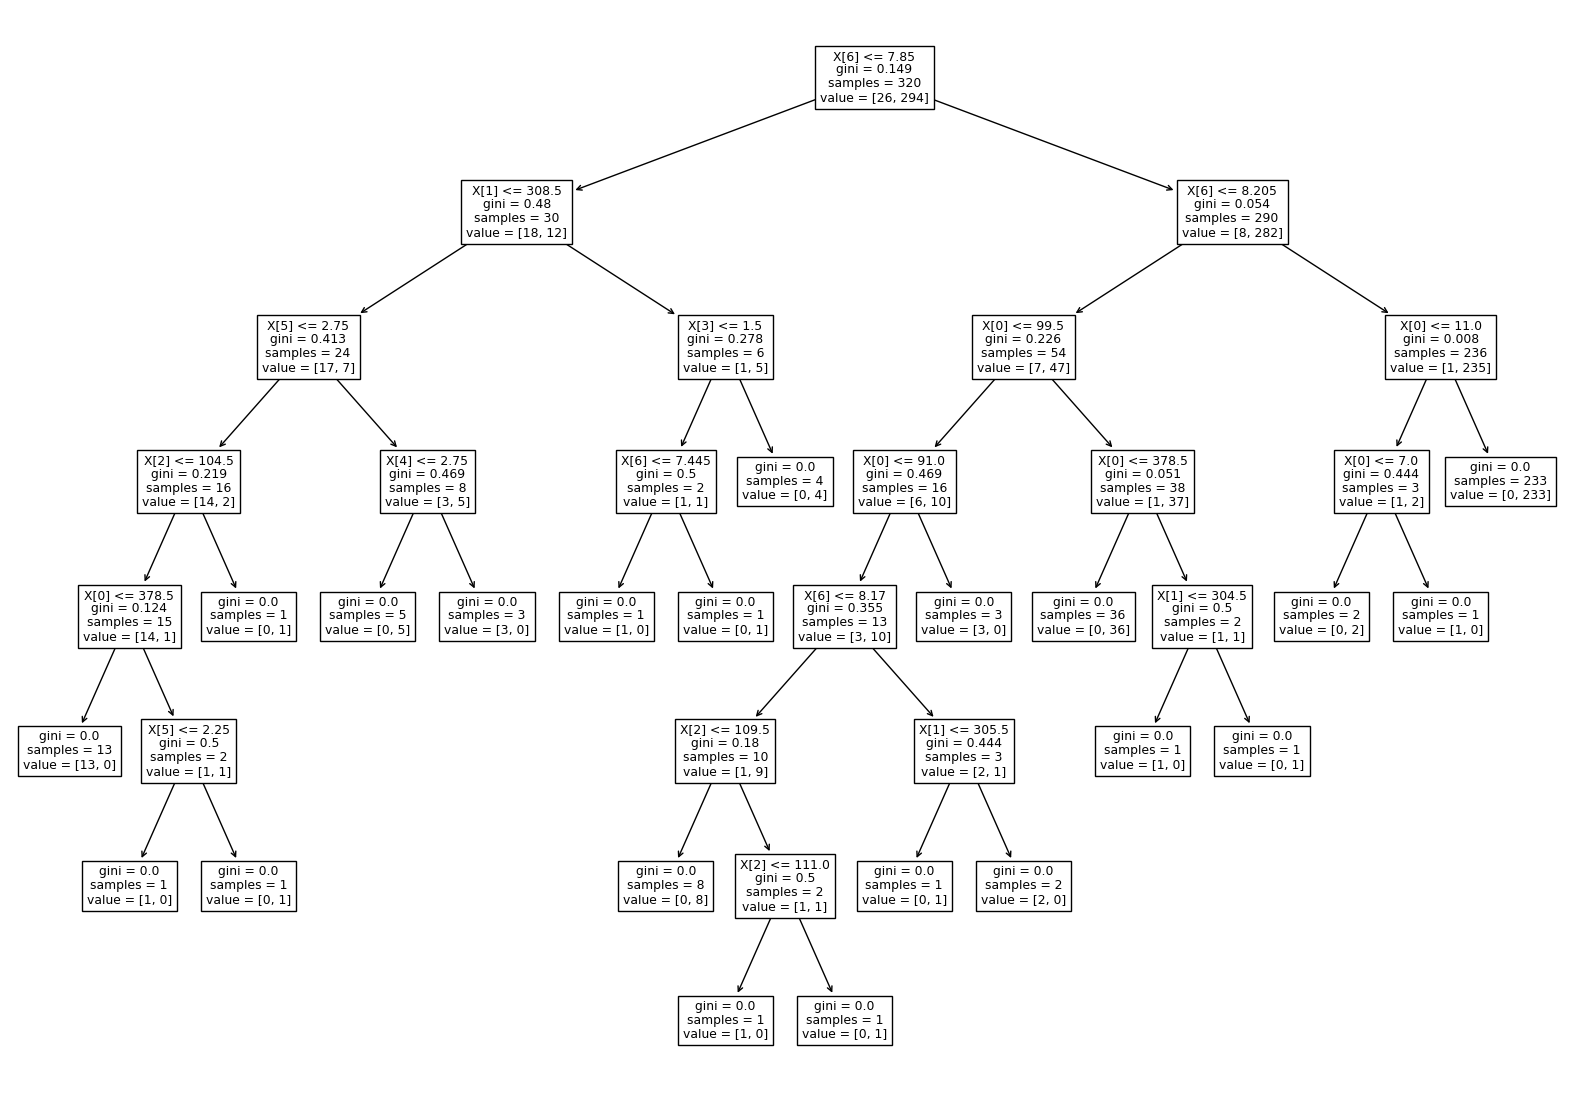

In [29]:
plt.figure(figsize=(20,14))
plot_tree(dtree)